<a href="https://colab.research.google.com/github/azal17/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading
The dataset contains 16 attributes

In [ ]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,confusion_matrix,ConfusionMatrixDisplay


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('vaccination_tweets.csv', on_bad_lines='skip')


In [ ]:
df.head(n =6)

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   
5  1337852648389832708                   Dee        Birmingham, England   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
5  Gastroenterology trainee, Clinical Research Fe...  2020-01-26 21:43:12   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   
5             105           108              106          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
5  2020-12-12 20:11:42  Does anyone have any useful advice/guidance fo...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   
5                                                NaN   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False  
5         0          0       False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isnull()

id  user_name  user_location  user_description  user_created  \
0      False      False          False             False         False   
1      False      False          False             False         False   
2      False      False          False             False         False   
3      False      False          False             False         False   
4      False      False           True             False         False   
...      ...        ...            ...               ...           ...   
11015  False      False          False             False         False   
11016  False      False           True             False         False   
11017  False      False          False             False         False   
11018  False      False          False             False         False   
11019  False      False          False             False         False   

       user_followers  user_friends  user_favourites  user_verified   date  \
0               False         False            False          False  False   
1               False         False            False          False  False   
2               False         False            False          False  False   
3               False         False            False          False  False   
4               False         False            False          False  False   
...               ...           ...              ...            ...    ...   
11015           False         False            False          False  False   
11016           False         False            False          False  False   
11017           False         False            False          False  False   
11018           False         False            False          False  False   
11019           False         False            False          False  False   

        text  hashtags  source  retweets  favorites  is_retweet  
0      False     False   False     False      False       False  
1      False      True   False     False      False       False  
2      False     False   False     False      False       False  
3      False      True   False     False      False       False  
4      False     False   False     False      False       False  
...      ...       ...     ...       ...        ...         ...  
11015  False      True   False     False      False       False  
11016  False     False   False     False      False       False  
11017  False      True   False     False      False       False  
11018  False     False   False     False      False       False  
11019  False      True   False     False      False       False  

[11020 rows x 16 columns]

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
new_column = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      axis =1 )

In [ ]:
new_column

text
0      Same folks said daikon paste could treat a cyt...
1      While the world has been on the wrong side of ...
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3      Facts are immutable, Senator, even when you're...
4      Explain to me again why we need a vaccine @Bor...
...                                                  ...
11015  The number of Covid-19 cases today, 17 Novembe...
11016                      First dose ✅\n#PfizerBioNTech
11017  The number of Covid-19 cases today, 16 Novembe...
11018  #PfizerBioNTech has developed new pill #Paxlov...
11019  The number of Covid-19 cases today, 15 Novembe...

[11020 rows x 1 columns]

In [ ]:
print(new_column['text'].iloc[0],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 



In [ ]:
new_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


#Data Processing - usable form

Processing Function created

**Stop word Removal**

In [ ]:
nltk.download('punkt')

def data_processing(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text, flags = re.MULTILINE) #url removed
        text = re.sub(r'@\w+|@[A-Za-z0-9]+|#|^\w\s]', '', text) # @ and # removed ,^ removed

        # Stop Word Removal
        tokens = word_tokenize(text)
        filtered_text = [word for word in tokens if word not in stop_words]
        return " ".join(filtered_text)
    else:
        return ""

new_column.text = new_column['text'].apply(data_processing)
new_column = new_column.drop_duplicates(['text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data
new_column.text = new_column['text'].apply(lambda x: stemming(x))

<ipython-input-13-d9842f9cedcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column.text = new_column['text'].apply(lambda x: stemming(x))


In [ ]:
print(new_column['text'].iloc[0],"\n") # same removed, url removed

folks said daikon paste could treat cytokine storm pfizerbiontech 



In [ ]:
new_column.info() #duplicates removed, columns reduced

<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10534 non-null  object
dtypes: object(1)
memory usage: 164.6+ KB


*the data is ready for usage*

# Sentiment Analysis

In [ ]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

new_column['polarity'] = new_column['text'].apply(polarity)
#polarity column added

<ipython-input-16-ec5acb36f101>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column['polarity'] = new_column['text'].apply(polarity)


In [ ]:

#adding a sentiment column
def sentiment(polarity):
  if polarity < 0:
    return 'negative'
  elif polarity == 0:
    return 'neutral'
  else:
    return 'positive'

new_column['sentiment'] = new_column['polarity'].apply(sentiment)
new_column.head() #sentiment column added

<ipython-input-17-644870ce3fcb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column['sentiment'] = new_column['polarity'].apply(sentiment)


text  polarity sentiment
0  folks said daikon paste could treat cytokine s...       0.0   neutral
1  world wrong side history year , hopefully , bi...      -0.5  negative
2  coronavirus sputnikv astrazeneca pfizerbiontec...       0.0   neutral
3  facts immutable , senator , even 're ethically...       0.1  positive
4  explain need vaccine whereareallthesickpeople ...       0.0   neutral

# Vizualize

In [ ]:
new_column.head(n =10)

text  polarity sentiment
0  folks said daikon paste could treat cytokine s...     0.000   neutral
1  world wrong side history year , hopefully , bi...    -0.500  negative
2  coronavirus sputnikv astrazeneca pfizerbiontec...     0.000   neutral
3  facts immutable , senator , even 're ethically...     0.100  positive
4  explain need vaccine whereareallthesickpeople ...     0.000   neutral
5  anyone useful advice/guidance whether covid va...     0.400  positive
6  bit sad claim fame success vaccination patriot...    -0.100  negative
7  many bright days 2020 best 1. bidenharris winn...     0.675  positive
8  covid vaccine ; getting ? covidvaccine covid19...     0.000   neutral
9  covidvaccine states start getting covid19vacci...     0.000   neutral

<Axes: xlabel='sentiment', ylabel='count'>

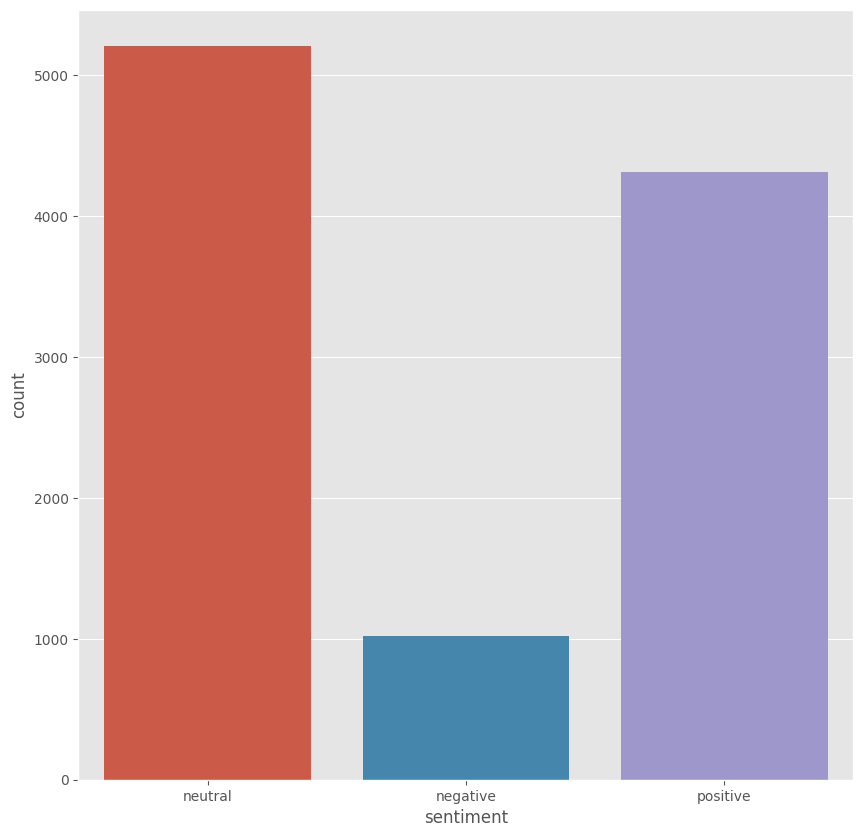

In [ ]:
fig = plt.figure(figsize = (10,10))
colors = ['red', 'yellow', 'cyan']
sns.countplot(x = new_column['sentiment'],hue = 'sentiment',data = new_column)



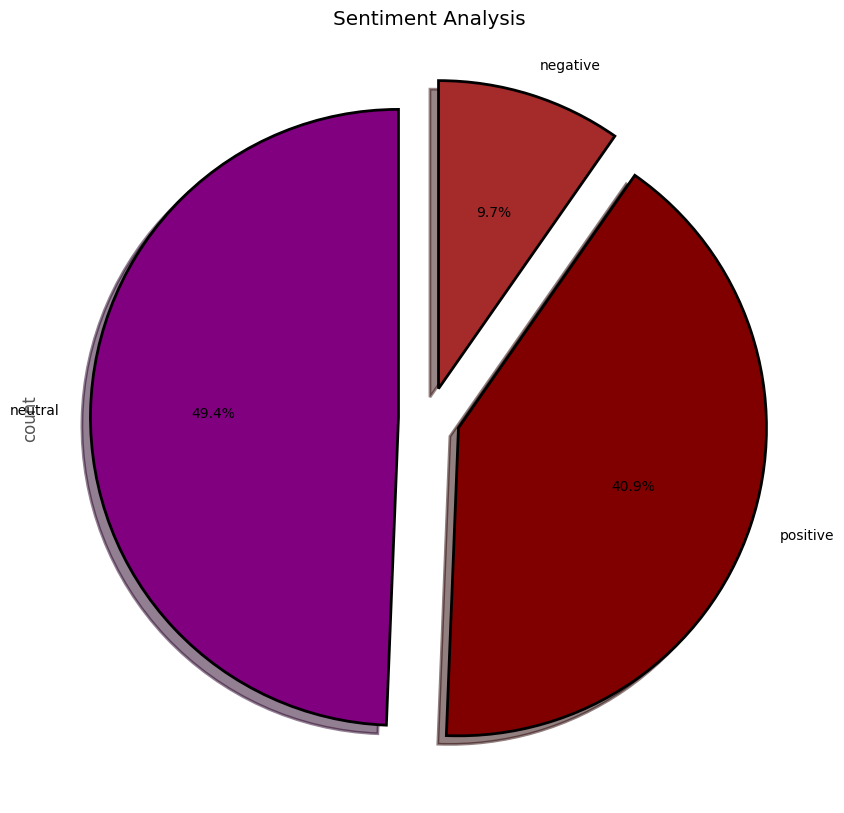

In [ ]:
fig = plt.figure(figsize=(10, 10))
colors = ["Purple","Maroon","Brown"]

wp = {'linewidth':2, 'edgecolor':"black"}

tags = new_column['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
labels = tags.index
sizes = tags.values

tags.plot(kind = "pie",autopct = "%1.1f%%", shadow =True, colors = colors,
          startangle = 90, wedgeprops = wp, explode = explode, labels = labels) # Assign labels here
plt.title("Sentiment Analysis")
plt.show()

In [ ]:
positive_tweets = new_column[new_column.sentiment == 'positive']
positive_tweets = positive_tweets.sort_values(['polarity'], ascending = False)

negative_tweets = new_column[new_column.sentiment == 'negative']
negative_tweets = negative_tweets.sort_values(['polarity'], ascending = False)


neutral_tweets = new_column[new_column.sentiment =='neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)

positive_tweets.head()

text  polarity sentiment
3276  thank ! excellent roll covid19 vaccination pro...       1.0  positive
7597  see smile ! ! ! ! two done ! ! ! gotmyshot two...       1.0  positive
1145  working covid vaccine clinic day today . lots ...       1.0  positive
4395  echoing great news ! since pfizerbiontech covi...       1.0  positive
6295  pfizer jab morning . efficient well-organised ...       1.0  positive

## Positive Words Word Cloud

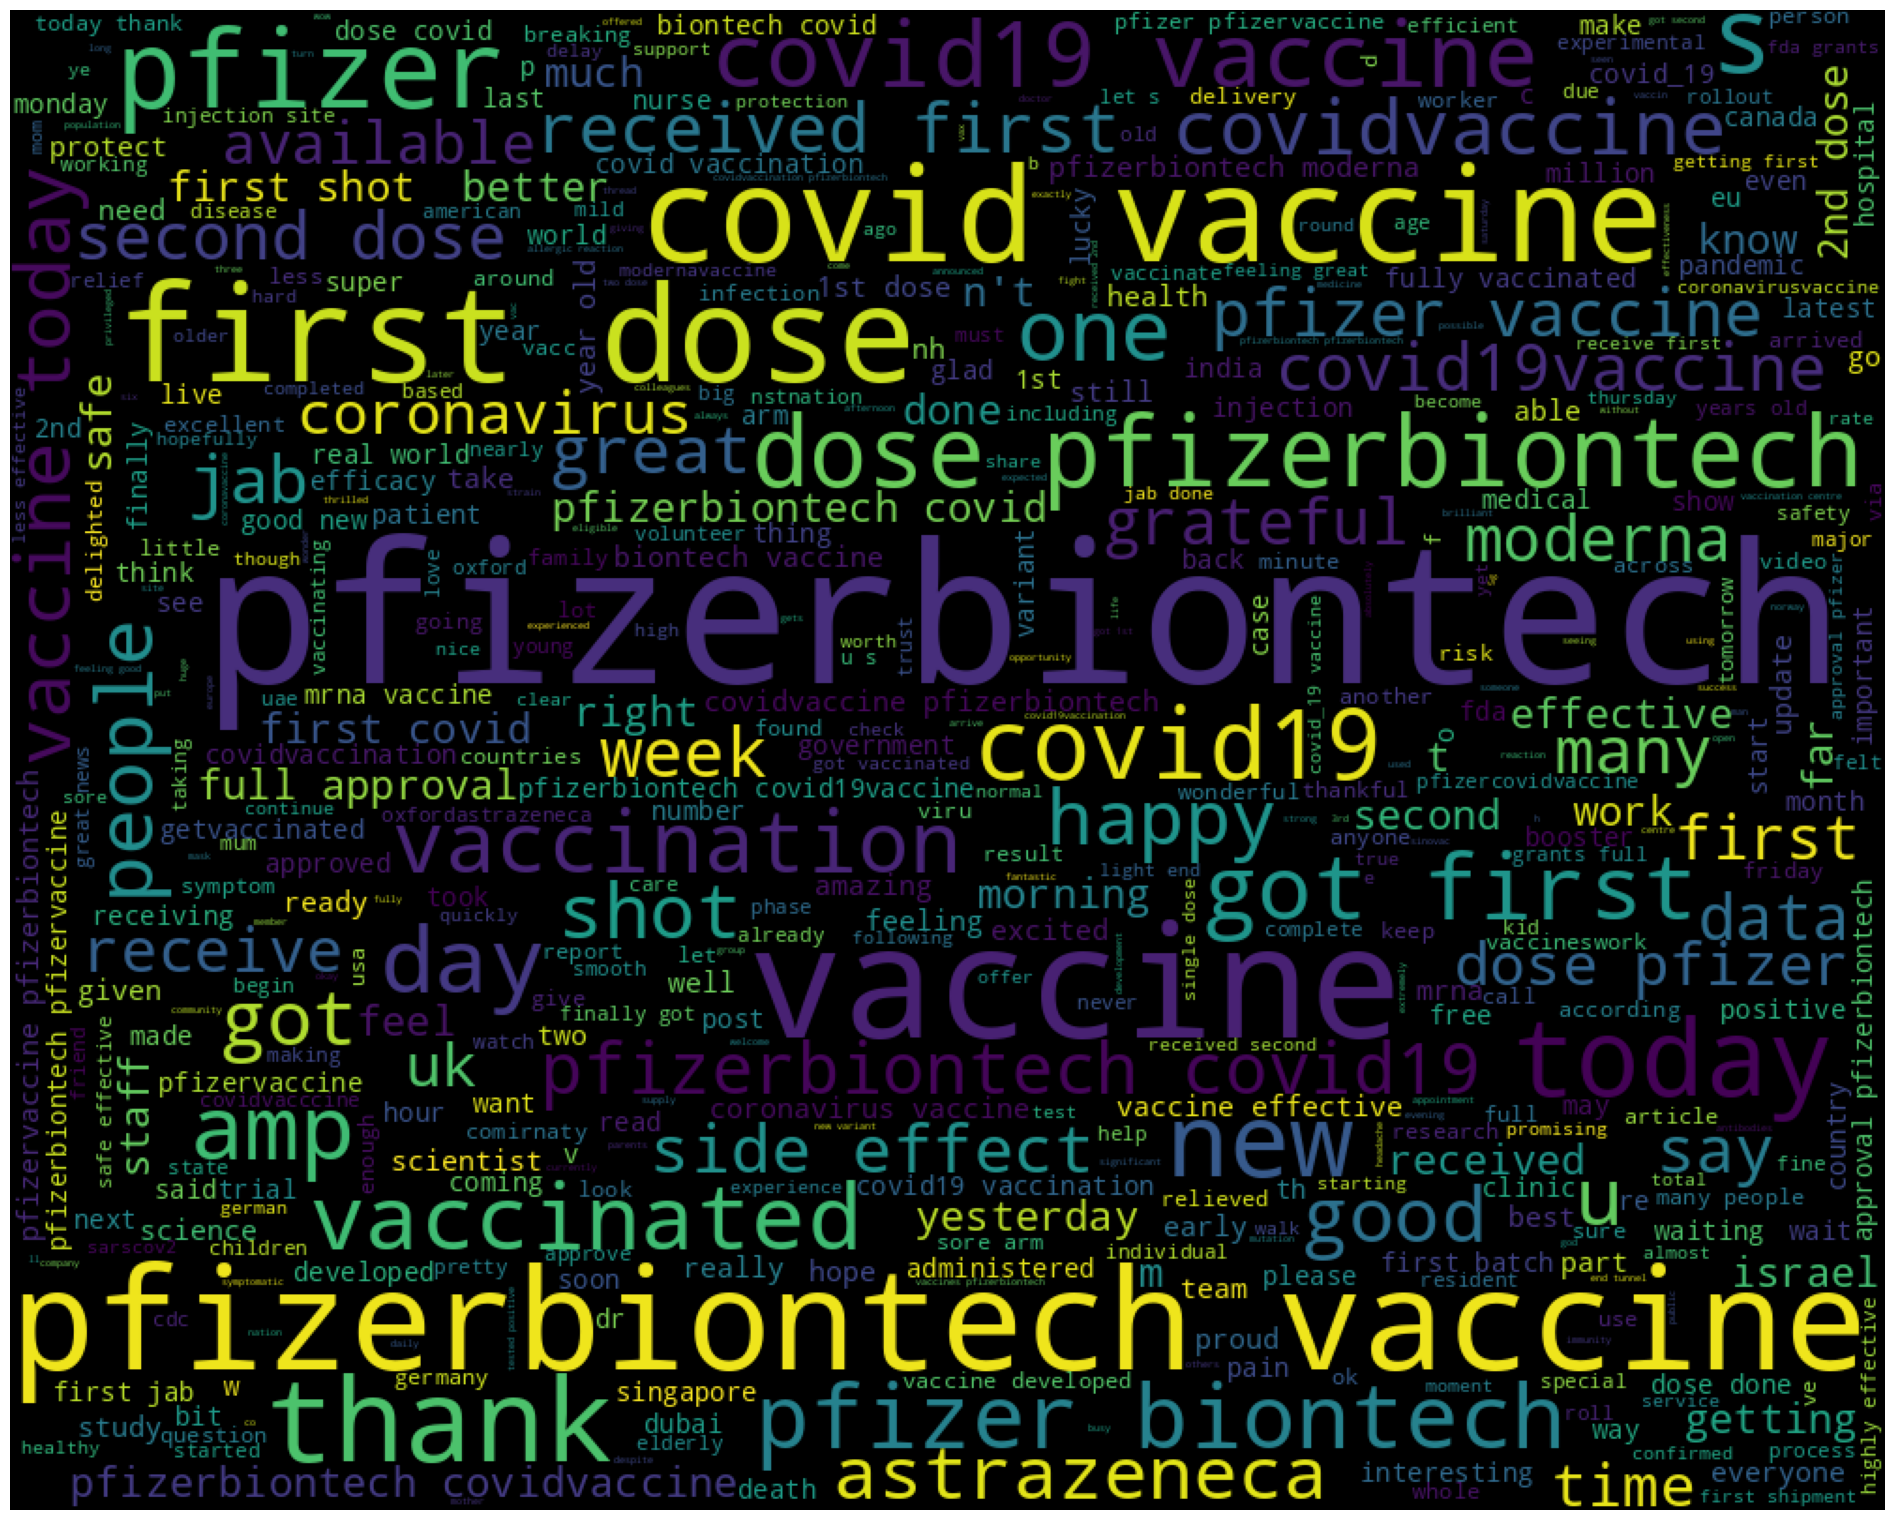

In [ ]:
joined_positive_tweets = ' '.join(word for word in positive_tweets['text'])
joined_negative_tweets = ' '.join(word for word in negative_tweets['text'])
joined_neutral_tweets = ' '.join(word for word in neutral_tweets['text'])
plt.figure(figsize = (20,15),facecolor = "None")
wordcloud = WordCloud(max_words=500,width = 1000,height =800).generate(joined_positive_tweets)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Negative Words Word Cloud

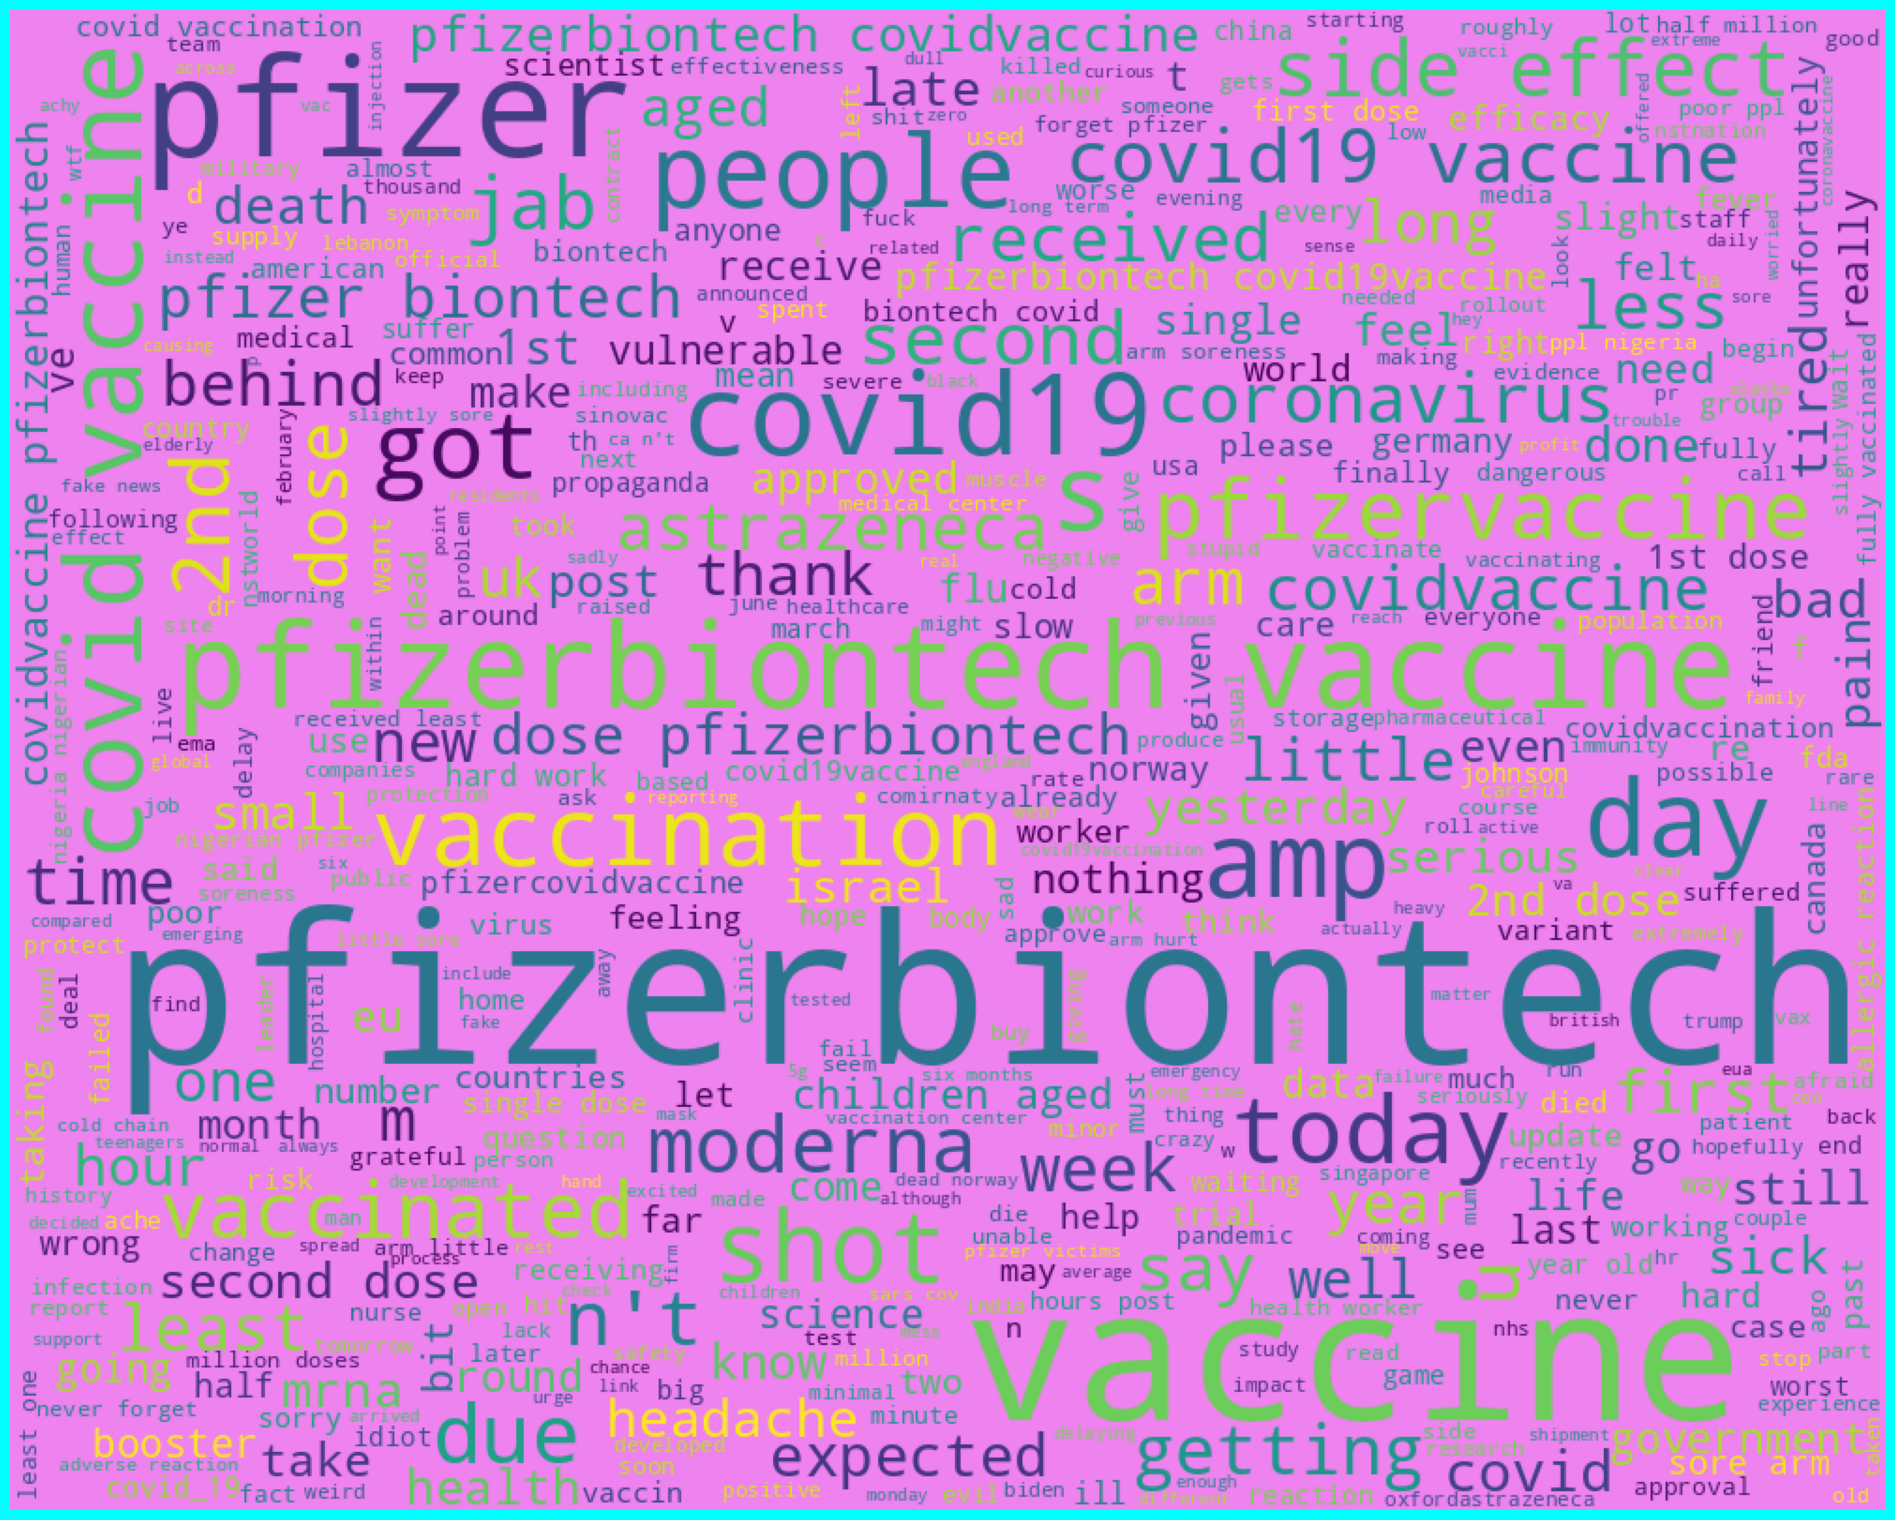

In [ ]:
plt.figure(figsize=(20, 15), facecolor="Cyan")
wordcloud = WordCloud(max_words=500, width=1000, height=800, background_color="Violet").generate(joined_negative_tweets)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Neutral Words Word Cloud

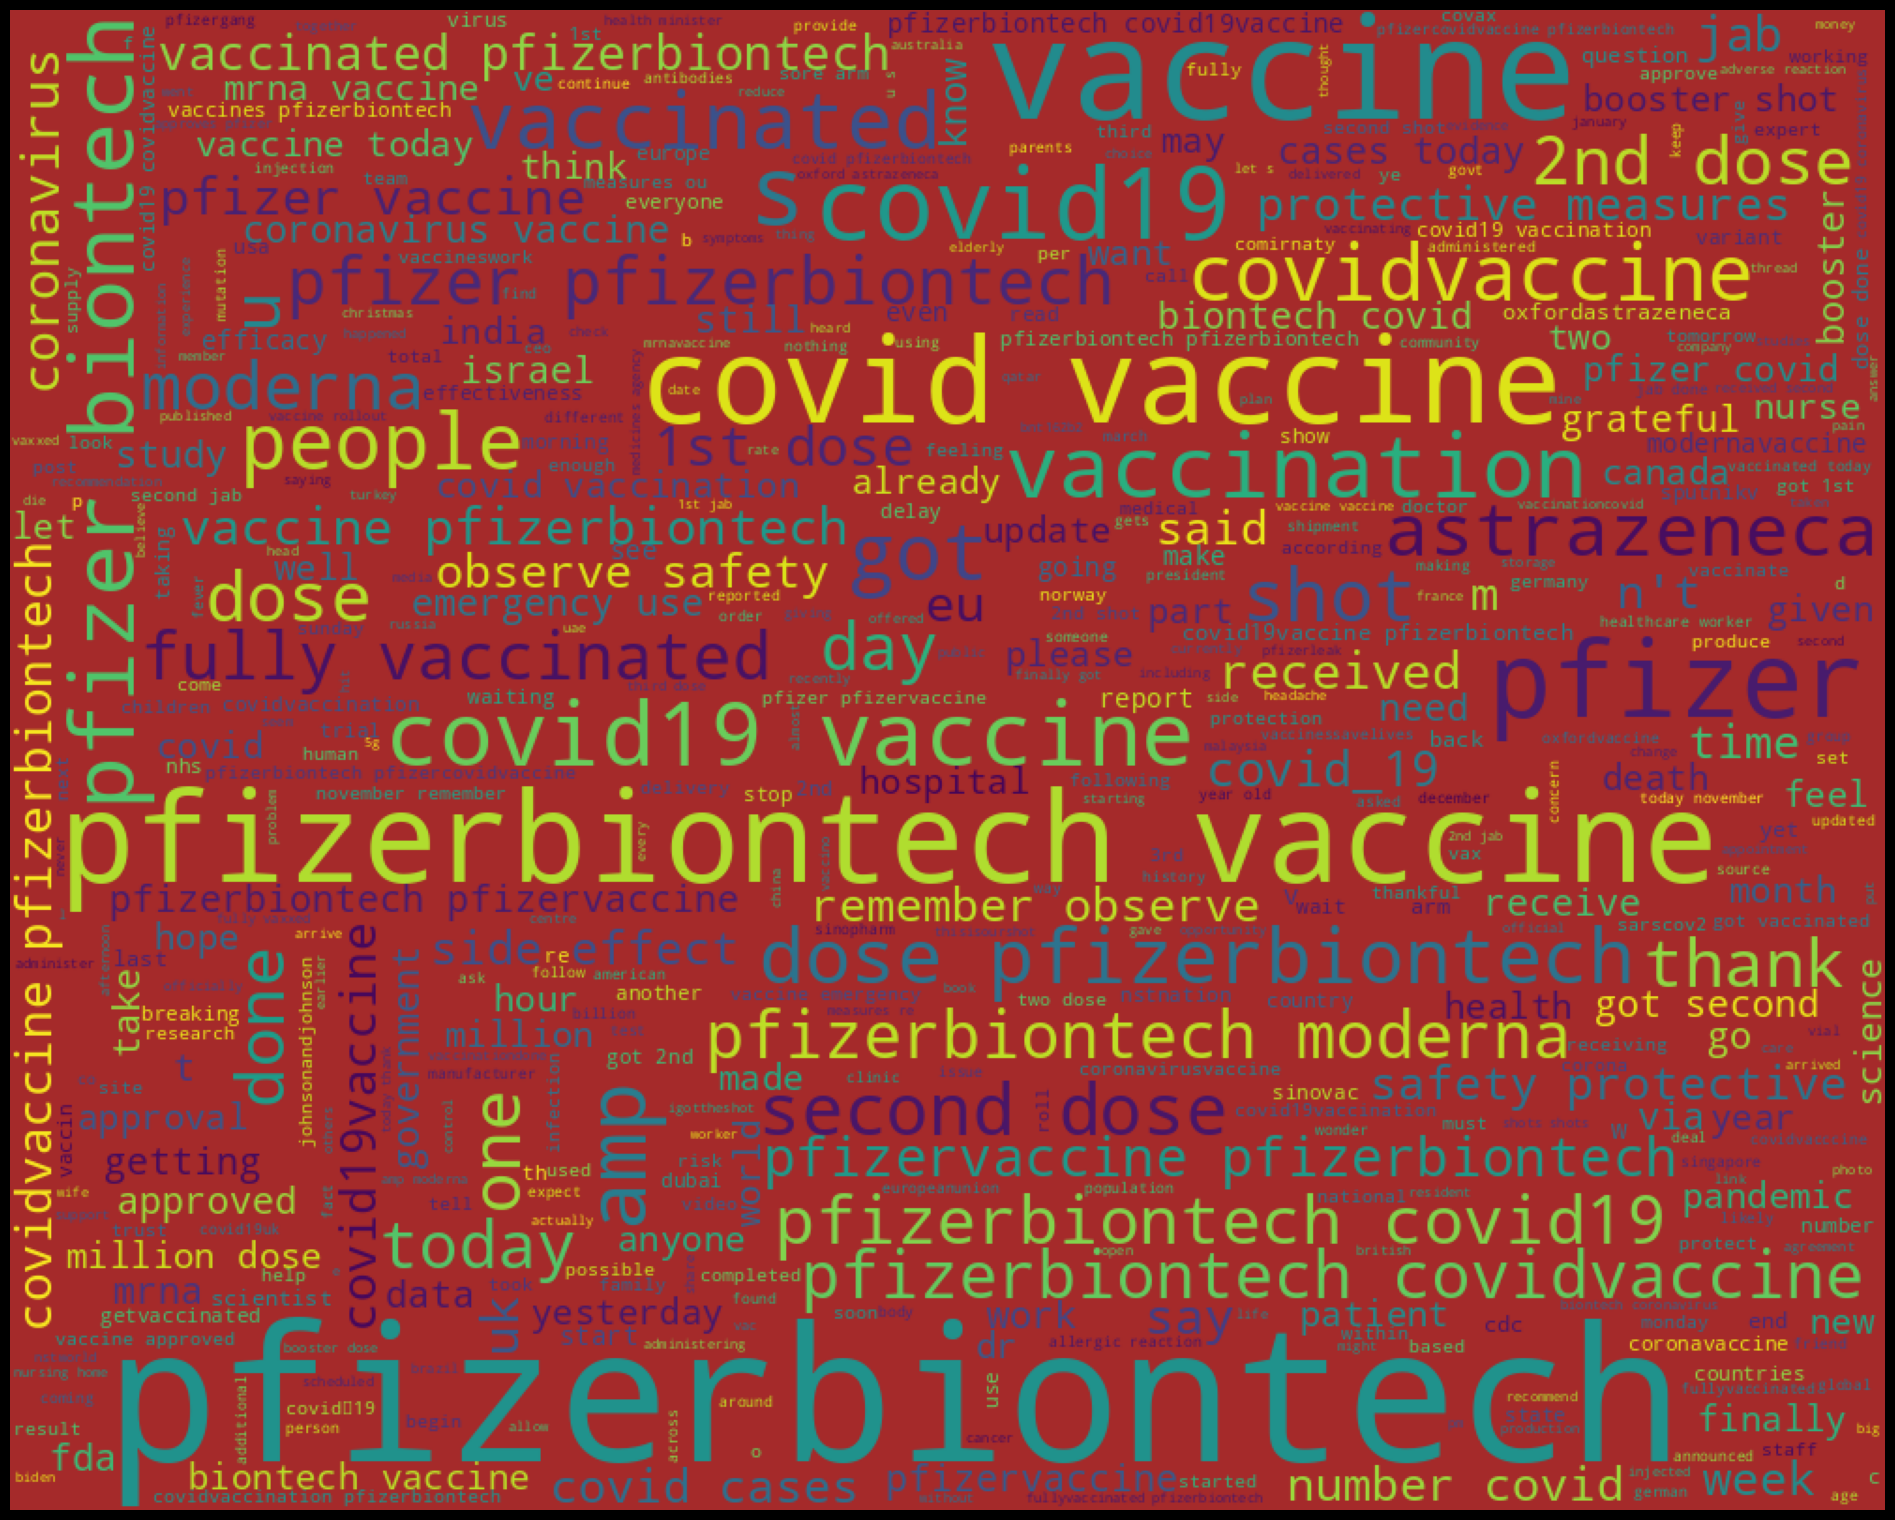

In [ ]:
plt.figure(figsize=(20, 15), facecolor="Black")
wordcloud = WordCloud(max_words=500, width=1000, height=800, background_color="Brown").generate(joined_neutral_tweets)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Vectorization

In [ ]:
vect = CountVectorizer(ngram_range = (1,2)).fit(new_column['text'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 feature:\n {}".format(feature_names[:20]))
# from the output we can deduce that its bigram

Number of features: 71434

First 20 feature:
 ['00' '00 000' '00 15' '00 doses' '00 hkt' '00 r4' '00 tonight' '000'
 '000 987' '000 advers' '000 adverse' '000 albertans' '000 americans'
 '000 australians' '000 citizens' '000 coronavirus' '000 counting'
 '000 covid19' '000 covidbrazil' '000 dead']


In [ ]:
X = new_column['text']
Y = new_column['sentiment']
X = vect.transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 500)

In [ ]:
x_train.shape

(8427, 71434)

# Training the data on logistic regression model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

test_pred = logistic_regression.predict(x_test)
train_pred =  logistic_regression.predict(x_train)

test_accuracy = accuracy_score(test_pred,y_test)
print("Test accuracy: {:.2f}%".format(test_accuracy*100))



Test accuracy: 84.15%


In [ ]:
test_pred

array(['neutral', 'positive', 'positive', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,test_pred))
print('\n')
print(classification_report(y_test,test_pred))

[[  46  111   33]
 [   5 1005   24]
 [  13  148  722]]


              precision    recall  f1-score   support

    negative       0.72      0.24      0.36       190
     neutral       0.80      0.97      0.87      1034
    positive       0.93      0.82      0.87       883

    accuracy                           0.84      2107
   macro avg       0.81      0.68      0.70      2107
weighted avg       0.84      0.84      0.83      2107



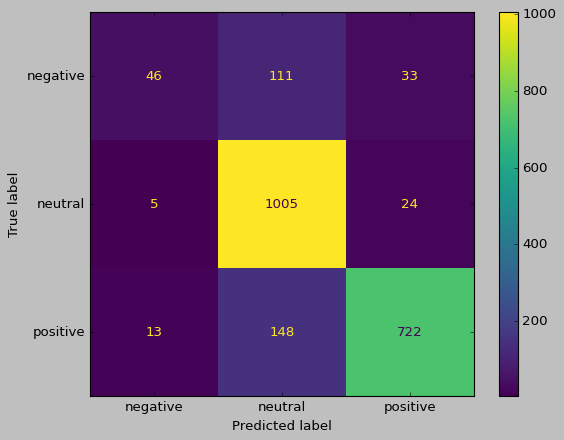

In [ ]:
# another way

style.use('classic')
cm = confusion_matrix(y_test,test_pred,labels = logistic_regression.classes_ )

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regression.classes_)
disp.plot()
plt.show()

# Hyper-paramter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.01,.01,1,10]} #logistic regression performs tunning on C parameter
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.01, 1, 10]})

In [ ]:
print("Best parameters: ",grid.best_params_)

Best parameters:  {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.91%


Slight improvement after hyper-tunning

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[  54  103   33]
 [   5 1007   22]
 [  12  143  728]]


              precision    recall  f1-score   support

    negative       0.76      0.28      0.41       190
     neutral       0.80      0.97      0.88      1034
    positive       0.93      0.82      0.87       883

    accuracy                           0.85      2107
   macro avg       0.83      0.69      0.72      2107
weighted avg       0.85      0.85      0.84      2107



###SVM

In [ ]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred =SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 86.90%


In [ ]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[  70   92   28]
 [   5 1005   24]
 [  13  114  756]]


              precision    recall  f1-score   support

    negative       0.80      0.37      0.50       190
     neutral       0.83      0.97      0.90      1034
    positive       0.94      0.86      0.89       883

    accuracy                           0.87      2107
   macro avg       0.85      0.73      0.76      2107
weighted avg       0.87      0.87      0.86      2107



###Hyperparameter tuning SVM

In [ ]:
param_grid = {
    'C':[0.01,0.1,1,10], 'kernel':['linear','poly','rbf','sigmoid'], 'degree': [1,3,5,7],'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel,param_grid)
grid.fit(x_train,y_train)

In [ ]:
print("Best parameter: ",grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))